# 2023 INSEE - BASE DU DOSSIER COMPLET #

Source : https://www.insee.fr/fr/statistiques/5359146  
Communes : https://www.insee.fr/fr/information/6800675

## OBSERVATIONS SUITE EDA ##

- **Shape** : (35001, 1881)
- **Dtypes** : 
    - 28 variables de type objet / 1853 variables de type float
    - 27 des variables de type objet doivent en réalité être de type numérique et sont à corriger. Seul le CODGEO doit rester un objet.
- **NaN** : 
    - Quelques variables très incomplètes. Une majorité de variables avec peu de NaN
    - Des NaN restent à identifier : présence de "s" et de "nd" et de données numériques avec des virgules au lieu de points
- **Duplicates** : aucun
- **Niveau géographique** : Présence d'arrondissements municipaux et de communes déléguées (ayant une commune parent) dont il faut se séparer pour que chaque observation soit équivalente à une commune
- **Absence de données géo** : les départements, les régions, les AAV ne sont pas dans la base. Il faut réaliser un merge avec les bases géographiques de l'INSEE
- **Shape après traitement géo (retrait des arrondissements et communes déléguées)** : (34375, 1882)
- **Codes région et départements manquants** : uniquement dans le fichier communes mais aucune donnée manquante après le merge

## LIBRAIRIES ##

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns

## EDA ##

Ouverture de la base (taille de 632 MB)

In [2]:
df = pd.read_csv('dossier_complet.csv', sep=';', low_memory=False)

In [3]:
df.head()

CODGEO  P20_POP  P20_POP0014  P20_POP1529  P20_POP3044  P20_POP4559  \
0  01001    806.0   155.306150    97.169380   148.761022   191.372049   
1  01002    262.0    57.242248    33.095709    56.756395    56.376187   
2  01004  14288.0  2649.807321  3027.794160  2691.337871  2427.065245   
3  01005   1782.0   353.000000   273.000000   369.000000   387.000000   
4  01006    113.0     9.912281    13.877193    19.824561    23.789474   

   P20_POP6074  P20_POP7589  P20_POP90P     P20_POPH    P20_H0014  \
0   143.616249    64.277500    5.497650   410.480215    90.988626   
1    38.184730    18.601713    1.743019   137.369209    27.091105   
2  2169.634700  1131.402296  190.958407  6880.642235  1378.028628   
3   277.000000   113.000000   10.000000   893.000000   185.000000   
4    37.666667     7.929825    0.000000    59.473684     4.956140   

     P20_H1529    P20_H3044    P20_H4559   P20_H6074   P20_H7589   P20_H90P  \
0    46.333975    72.821830    96.274332   70.021619   31.274596   2.765236   
1    22.862533    24.579809    31.677656   20.536348    9.722974   0.898784   
2  1521.769879  1372.912932  1169.882541  957.357819  444.069361  36.621075   
3   136.000000   177.000000   195.000000  144.000000   53.000000   3.000000   
4     7.929825    11.894737    12.885965   18.833333    2.973684   0.000000   

     P20_H0019    P20_H2064     P20_H65P     P20_POPF    P20_F0014  \
0   114.880834   222.006256    73.593126   395.519785    64.317524   
1    40.326488    72.476812    24.565908   124.630791    30.151143   
2  1893.653990  3984.584772  1002.403473  7407.357765  1271.778693   
3   230.000000   523.000000   140.000000   889.000000   168.000000   
4     6.938596    39.649123    12.885965    53.526316     4.956140   

     P20_F1529    P20_F3044    P20_F4559    P20_F6074   P20_F7589    P20_F90P  \
0    50.835405    75.939193    95.097717    73.594630   33.002904    2.732413   
1    10.233176    32.176586    24.698531    17.648381    8.878739    0.844235   
2  1506.024280  1318.424939  1257.182704  1212.276881  687.332935  154.337333   
3   137.000000   192.000000   192.000000   133.000000   60.000000    7.000000   
4     5.947368     7.929825    10.903509    18.833333    4.956140    0.000000   

     P20_F0019    P20_F2064     P20_F65P    P20_POP01P  P20_POP01P_IRAN1  \
0    87.045794   223.998645    84.475346    793.541186        714.455817   
1    37.448173    67.736670    19.445948    257.987100        250.371790   
2  1729.447823  4095.784718  1582.125224  14101.806219      12220.936715   
3   213.000000   528.000000   148.000000   1757.000000       1552.000000   
4     6.938596    27.754386    18.833333    111.017544         96.149123   

   P20_POP01P_IRAN2  P20_POP01P_IRAN3  P20_POP01P_IRAN4  P20_POP01P_IRAN5  \
0          6.436401         48.056527         18.927085          5.665356   
1          0.844235          4.074725          0.000000          2.696351   
2        638.319150        661.843067        261.340620        220.391195   
3         30.000000         87.000000         77.000000         11.000000   
4          0.000000          3.964912          9.912281          0.000000   

   P20_POP01P_IRAN6  P20_POP01P_IRAN7  P20_POP0114_IRAN2P  P20_POP0114_IRAN2  \
0          0.000000          0.000000           17.251895           0.000000   
1          0.000000          0.000000            1.018681           0.000000   
2         19.325262         79.650211          305.309865         116.377365   
3          0.000000          0.000000           40.000000           6.000000   
4          0.000000          0.991228            0.991228           0.000000   

   P20_POP0114_IRAN3P  P20_POP1524_IRAN2P  P20_POP1524_IRAN2  \
0           17.251895            6.672172           0.000000   
1            1.018681            1.018681           0.000000   
2          188.932500          436.240954         112.963426   
3           34.000000           24.000000           4.000000   
4            0.991228            1.982456   

### Shape ###

In [4]:
df.shape

(35001, 1881)

### Dtypes ###

In [5]:
df.dtypes.value_counts()

float64    1853
object       28
dtype: int64

In [6]:
df.select_dtypes('object')

,CODGEO,NBMENFISC20,NBPERSMENFISC20,MED20,PIMP20,TP6020,TP60AGE120,TP60AGE220,TP60AGE320,TP60AGE420,TP60AGE520,TP60AGE620,TP60TOL120,TP60TOL220,PACT20,PTSA20,PCHO20,PBEN20,PPEN20,PPAT20,PPSOC20,PPFAM20,PPMINI20,PPLOGT20,PIMPOT20,D120,D920,RD20
0,01001,331,842,24820,s,s,s,s,s,s,s,s,s,s,s,s,s,s,s,s,s,s,s,s,s,s,s,s
1,01002,116,264,23220,s,s,s,s,s,s,s,s,s,s,s,s,s,s,s,s,s,s,s,s,s,s,s,s
2,01004,6882,15358,21070,"48,0","17,0","24,0","22,0","18,0","16,0","11,0",s,"5,0","27,0","72,2","65,4","3,5","3,3","26,1","8,0","8,2","2,9","3,6","1,7","-14,5",11490,35550,"3,1"
3,01005,767,1939,24380,s,s,s,s,s,s,s,s,s,s,s,s,s,s,s,s,s,s,s,s,s,s,s,s
4,01006,s,s,s,s,s,s,s,s,s,s,s,s,s,s,s,s,s,s,s,s,s,s,s,s,s,s,s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34996,97613,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34997,97614,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34998,97615,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34999,97616,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### NaN ###

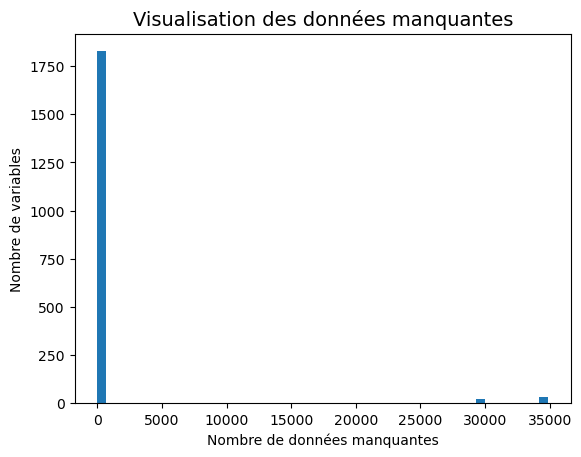

In [7]:
plt.hist(df.isna().sum(), bins=50)
plt.title('Visualisation des données manquantes', fontsize=14)
plt.xlabel('Nombre de données manquantes')
plt.ylabel('Nombre de variables')
plt.show()

In [8]:
no_float = {}
for i in df.select_dtypes('object').columns[1:]:
    no_float[i] = []
    for j in df[i]:
        try:
            float(j)
        except:
            if j not in no_float[i]:
                no_float[i].append(j)
    no_float[i] = np.unique(no_float[i])

#Affichage d'une variable représentative
print(no_float['PIMP20'])

['15,0' '16,0' '17,0' '18,0' '19,0' '20,0' '21,0' '22,0' '23,0' '24,0'
 '25,0' '26,0' '27,0' '28,0' '29,0' '30,0' '31,0' '32,0' '33,0' '34,0'
 '35,0' '36,0' '37,0' '38,0' '39,0' '40,0' '41,0' '42,0' '43,0' '44,0'
 '45,0' '46,0' '47,0' '48,0' '49,0' '50,0' '51,0' '52,0' '53,0' '54,0'
 '55,0' '56,0' '57,0' '58,0' '59,0' '60,0' '61,0' '62,0' '63,0' '64,0'
 '65,0' '66,0' '67,0' '68,0' '69,0' '70,0' '71,0' '72,0' '73,0' '74,0'
 '75,0' '76,0' '77,0' '78,0' '79,0' '80,0' '81,0' '82,0' '83,0' '84,0'
 '86,0' 'nd' 's']


On élimine le problème des virgules

In [9]:
df= df.replace(',', '.', regex=True)

On réitére le test de conversion des variables en float

In [10]:
no_float = {}
for i in df.select_dtypes('object').columns[1:]:
    no_float[i] = []
    for j in df[i]:
        try:
            float(j)
        except:
            if j not in no_float[i]:
                no_float[i].append(j)
    no_float[i] = np.unique(no_float[i])

#Affichage d'une variable représentative
print(no_float)

{'NBMENFISC20': array(['nd', 's'], dtype='<U2'), 'NBPERSMENFISC20': array(['nd', 's'], dtype='<U2'), 'MED20': array(['nd', 's'], dtype='<U2'), 'PIMP20': array(['nd', 's'], dtype='<U2'), 'TP6020': array(['nd', 's'], dtype='<U2'), 'TP60AGE120': array(['nd', 's'], dtype='<U2'), 'TP60AGE220': array(['nd', 's'], dtype='<U2'), 'TP60AGE320': array(['nd', 's'], dtype='<U2'), 'TP60AGE420': array(['nd', 's'], dtype='<U2'), 'TP60AGE520': array(['nd', 's'], dtype='<U2'), 'TP60AGE620': array(['nd', 's'], dtype='<U2'), 'TP60TOL120': array(['nd', 's'], dtype='<U2'), 'TP60TOL220': array(['nd', 's'], dtype='<U2'), 'PACT20': array(['nd', 's'], dtype='<U2'), 'PTSA20': array(['nd', 's'], dtype='<U2'), 'PCHO20': array(['nd', 's'], dtype='<U2'), 'PBEN20': array(['nd', 's'], dtype='<U2'), 'PPEN20': array(['nd', 's'], dtype='<U2'), 'PPAT20': array(['nd', 's'], dtype='<U2'), 'PPSOC20': array(['nd', 's'], dtype='<U2'), 'PPFAM20': array(['nd', 's'], dtype='<U2'), 'PPMINI20': array(['nd', 's'], dtype='<U2'), 'PPL

Il ne reste plus que des 'nd' et 's'

In [11]:
df= df.replace(['nd', 's'], np.nan, regex=True)

In [12]:
no_float = {}
for i in df.select_dtypes('object').columns[1:]:
    no_float[i] = []
    for j in df[i]:
        try:
            float(j)
        except:
            if j not in no_float[i]:
                no_float[i].append(j)
    no_float[i] = np.unique(no_float[i])

#Affichage d'une variable représentative
print(no_float)

{'NBMENFISC20': array([], dtype=float64), 'NBPERSMENFISC20': array([], dtype=float64), 'MED20': array([], dtype=float64), 'PIMP20': array([], dtype=float64), 'TP6020': array([], dtype=float64), 'TP60AGE120': array([], dtype=float64), 'TP60AGE220': array([], dtype=float64), 'TP60AGE320': array([], dtype=float64), 'TP60AGE420': array([], dtype=float64), 'TP60AGE520': array([], dtype=float64), 'TP60AGE620': array([], dtype=float64), 'TP60TOL120': array([], dtype=float64), 'TP60TOL220': array([], dtype=float64), 'PACT20': array([], dtype=float64), 'PTSA20': array([], dtype=float64), 'PCHO20': array([], dtype=float64), 'PBEN20': array([], dtype=float64), 'PPEN20': array([], dtype=float64), 'PPAT20': array([], dtype=float64), 'PPSOC20': array([], dtype=float64), 'PPFAM20': array([], dtype=float64), 'PPMINI20': array([], dtype=float64), 'PPLOGT20': array([], dtype=float64), 'PIMPOT20': array([], dtype=float64), 'D120': array([], dtype=float64), 'D920': array([], dtype=float64), 'RD20': array(

Le dataset est désormais nettoyé des erreurs de format et de la codification de données manquantes

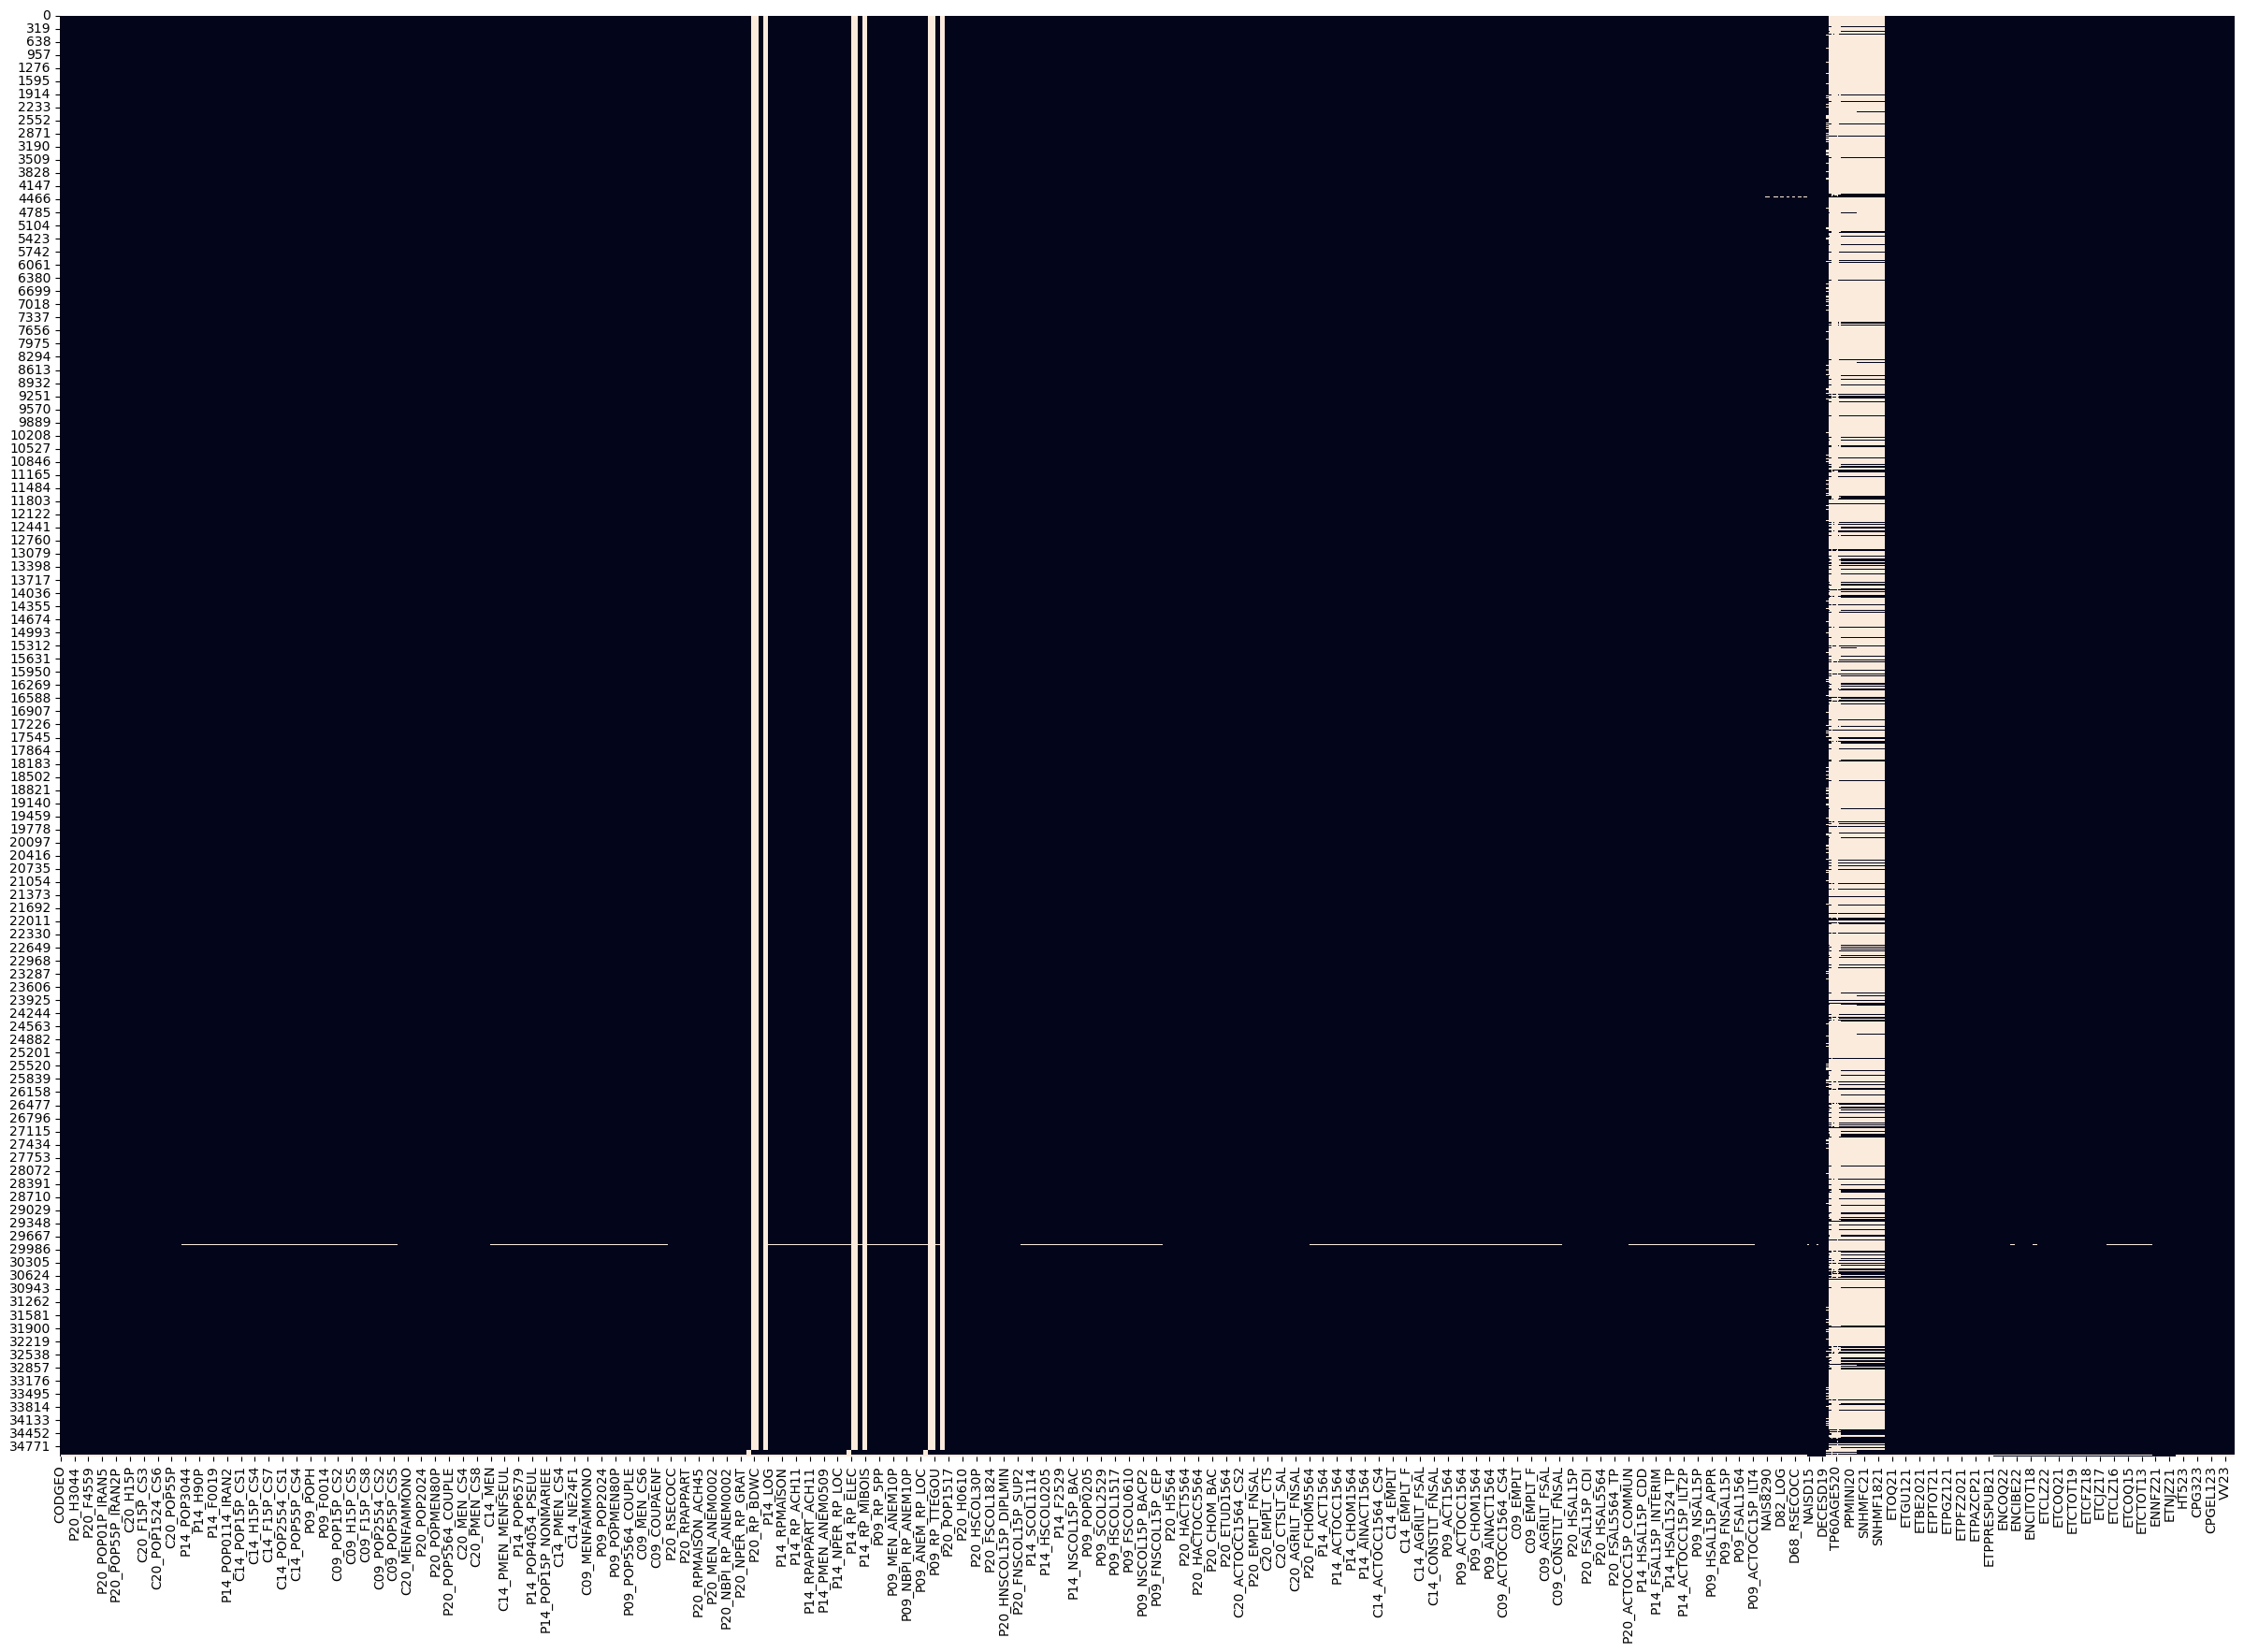

In [13]:
plt.figure(figsize=(30,20))
sns.heatmap(df.isna(), cbar=False)
plt.show()

### Duplicates ###

In [14]:
df.duplicated().sum()

0

### Gestion des communes ###

In [15]:
communes = pd.read_csv('https://www.insee.fr/fr/statistiques/fichier/6800675/v_commune_2023.csv')

In [16]:
communes.head()

,TYPECOM,COM,REG,DEP,CTCD,ARR,TNCC,NCC,NCCENR,LIBELLE,CAN,COMPARENT
0,COM,01001,84.0,01,01D,012,5,ABERGEMENT CLEMENCIAT,Abergement-Clémenciat,L'Abergement-Clémenciat,0108,NaN
1,COM,01002,84.0,01,01D,011,5,ABERGEMENT DE VAREY,Abergement-de-Varey,L'Abergement-de-Varey,0101,NaN
2,COM,01004,84.0,01,01D,011,1,AMBERIEU EN BUGEY,Ambérieu-en-Bugey,Ambérieu-en-Bugey,0101,NaN
3,COM,01005,84.0,01,01D,012,1,AMBERIEUX EN DOMBES,Ambérieux-en-Dombes,Ambérieux-en-Dombes,0122,NaN
4,COM,01006,84.0,01,01D,011,1,AMBLEON,Ambléon,Ambléon,0104,NaN


In [17]:
 communes.dtypes

TYPECOM       object
COM           object
REG          float64
DEP           object
CTCD          object
ARR           object
TNCC           int64
NCC           object
NCCENR        object
LIBELLE       object
CAN           object
COMPARENT    float64
dtype: object

In [18]:
communes.TYPECOM.value_counts()

COM     34945
COMD     2081
COMA      492
ARM        45
Name: TYPECOM, dtype: int64

Ajout de TYPECOM à df

In [19]:
dict_typeCom = dict(list(zip(communes['COM'], communes['TYPECOM'])))

In [20]:
df['TYPECOM'] = df['CODGEO'].map(dict_typeCom)

In [21]:
df['TYPECOM'].value_counts(dropna=False)

COM     34375
COMD      580
ARM        45
NaN         1
Name: TYPECOM, dtype: int64

In [22]:
df = df[df['TYPECOM'] == 'COM'].reset_index(drop=True)

In [23]:
df.shape

(34375, 1882)

Ajout du nom des communes à df

In [24]:
dict_labelCom = dict(list(zip(communes['COM'], communes['LIBELLE'])))

In [25]:
df['LIBELLE'] = df['CODGEO'].map(dict_labelCom)

Ajout du code région

In [26]:
#Des régions sont manquantes !
communes['REG'].value_counts(dropna=False)

44.0    5119
76.0    4453
75.0    4308
84.0    4037
32.0    3787
27.0    3699
28.0    2651
NaN     2573
24.0    1757
11.0    1288
52.0    1233
53.0    1207
93.0     962
94.0     360
2.0       34
1.0       32
4.0       24
3.0       22
6.0       17
Name: REG, dtype: int64

In [27]:
communes['REG'] = communes['REG'].replace(np.nan, 0).astype(int)

In [28]:
dict_RegCom = dict(list(zip(communes['COM'], communes['REG'])))

In [29]:
df['REG'] = df['CODGEO'].map(dict_RegCom)

In [30]:
df['REG'].value_counts(dropna=False)

44    5072
76    4408
75    4232
84    3951
32    3764
27    3665
28    2527
24    1736
11    1264
53    1173
52    1154
93     940
94     360
2       34
1       32
4       24
3       22
6       17
Name: REG, dtype: int64

Ajout du code département

In [31]:
communes['DEP'].value_counts(dropna=False)

NaN    2573
62      890
02      798
80      772
57      725
       ... 
971      32
974      24
973      22
75       21
976      17
Name: DEP, Length: 102, dtype: int64

In [32]:
dict_DepCom = dict(list(zip(communes['COM'], communes['DEP'])))

In [33]:
df['DEP'] = df['CODGEO'].map(dict_DepCom)

In [34]:
df['DEP'].value_counts(dropna=False)

62     888
02     790
80     767
57     721
76     699
      ... 
971     32
974     24
973     22
976     17
75       1
Name: DEP, Length: 101, dtype: int64

Ajout du libellé région

In [35]:
regions = pd.read_csv('https://www.insee.fr/fr/statistiques/fichier/6800675/v_region_2023.csv')

In [36]:
regions.head()

,REG,CHEFLIEU,TNCC,NCC,NCCENR,LIBELLE
0,1,97105,3,GUADELOUPE,Guadeloupe,Guadeloupe
1,2,97209,3,MARTINIQUE,Martinique,Martinique
2,3,97302,3,GUYANE,Guyane,Guyane
3,4,97411,0,LA REUNION,La Réunion,La Réunion
4,6,97608,0,MAYOTTE,Mayotte,Mayotte


In [37]:
regions.dtypes

REG          int64
CHEFLIEU    object
TNCC         int64
NCC         object
NCCENR      object
LIBELLE     object
dtype: object

In [38]:
regions = regions.rename(columns={'LIBELLE': 'LIBELLE_REG'})

In [39]:
df = df.merge(regions[['REG', 'LIBELLE_REG']], on='REG', how='left')

Ajout du libellé département

In [40]:
departements = pd.read_csv('https://www.insee.fr/fr/statistiques/fichier/6800675/v_departement_2023.csv')

In [41]:
departements.head()

,DEP,REG,CHEFLIEU,TNCC,NCC,NCCENR,LIBELLE
0,01,84,01053,5,AIN,Ain,Ain
1,02,32,02408,5,AISNE,Aisne,Aisne
2,03,84,03190,5,ALLIER,Allier,Allier
3,04,93,04070,4,ALPES DE HAUTE PROVENCE,Alpes-de-Haute-Provence,Alpes-de-Haute-Provence
4,05,93,05061,4,HAUTES ALPES,Hautes-Alpes,Hautes-Alpes


In [42]:
departements = departements.rename(columns={'LIBELLE': 'LIBELLE_DEP'})

In [43]:
df = df.merge(departements[['DEP', 'LIBELLE_DEP']], on='DEP', how='left')